# Unsupervised Learning

In the class we learned two commonly used unsupervised learning algorithms:
* Principal Component Analysis
* K-Means

In this exercise we will use the two to perform clustering for Iris Data set.

## Iris Dataset

[Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a very popular dataset in machine learning community. Developed by Fisher, it containd 3 classes each with 50 instances. Each of the three class refers to a type of Iris plant. Each data point consists of four different attributes and a class label:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 * Iris Setosa
 * Iris Versicolour
 * Iris Virginica




In [9]:
#@title Import Necessary Modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Exercise 1: Download Data

Download the data using `tf.keras.utils.get_file()` function. Pass two arguments to the function the file name and the url containg the data.

* For training data use the file name (`fname`) "iris_training.csv" and the url is "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

* For test data use the file name (`fname`) "iris_test.csv" and the url is "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

For more information and usage you can refer to [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file).



In [7]:
# To Do Complete the code
## Replace the ... with right code
train_path = tf.keras.utils.get_file('iris_training','https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')
test_path = tf.keras.utils.get_file('iris_test','https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv')

# ----------------- Do not change anything below ------------------------------------#
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)


8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


### Exercise 2: Data Analysis and Visualization

Analyze the data. Analyzing data is avery important skill. You can start from simple information like size of test and train dataset. To random sample of few to plotting between different features. [Here](https://www.kaggle.com/kstaud85/iris-data-visualization) is an example dataset visualization notebook for Iris Dataset. You can take some ideas from here.

As part of the exercise we expect you to perform atleast three analysis/visualizations. 
You can use as many code cells as you need.

Remember `train` and `test` are Pandas DataFrames.

In [8]:
## To do write code to analyze and visualize the data
#  you can add as many code cells as you requre
# below for example we show the top 5 samples from training dataset.
train.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  120 non-null    float64
 1   SepalWidth   120 non-null    float64
 2   PetalLength  120 non-null    float64
 3   PetalWidth   120 non-null    float64
 4   Species      120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  30 non-null     float64
 1   SepalWidth   30 non-null     float64
 2   PetalLength  30 non-null     float64
 3   PetalWidth   30 non-null     float64
 4   Species      30 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


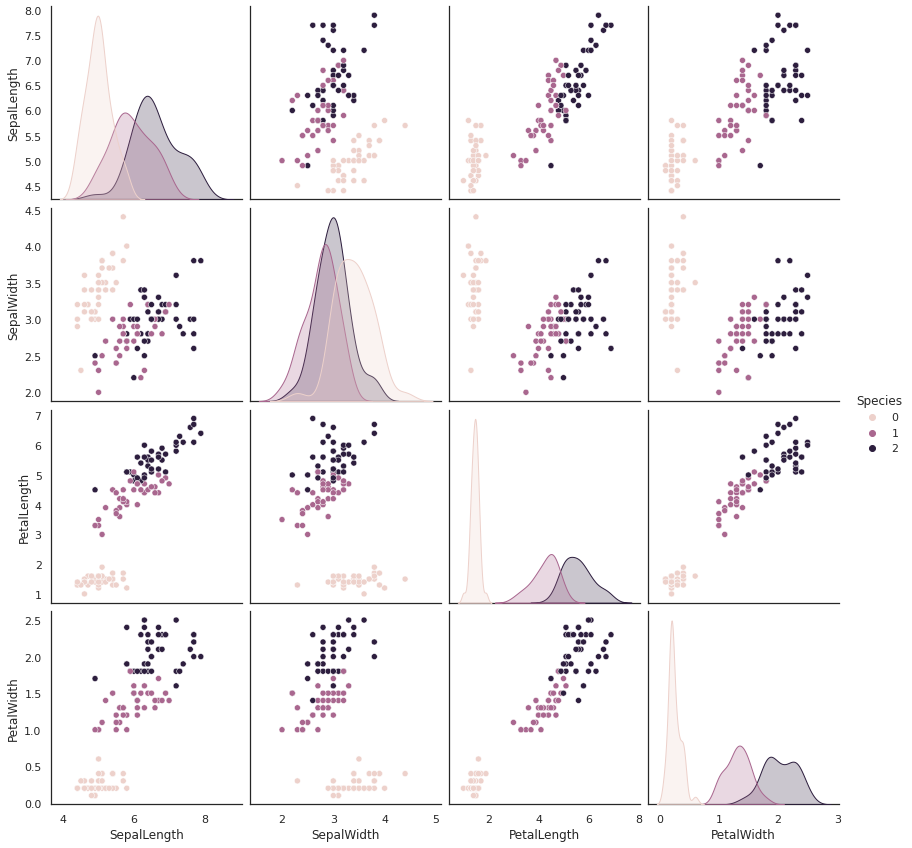

In [16]:
iris = train.append(test)
sns.pairplot(train, hue="Species", size=3)
plt.show()

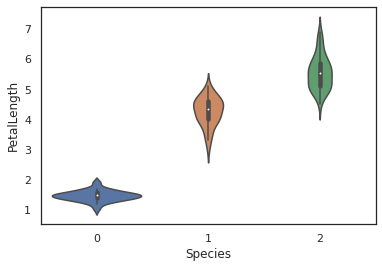

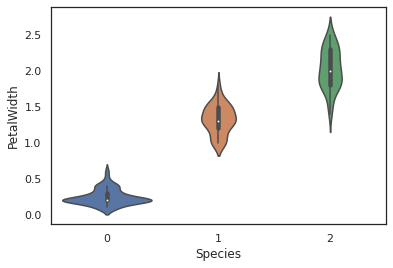

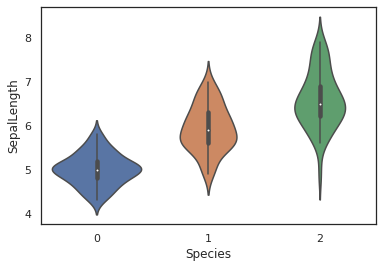

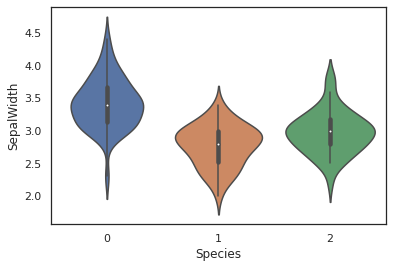

In [19]:
sns.violinplot(x="Species", y="PetalLength", data=iris, size=6)
plt.show()
sns.violinplot(x="Species", y="PetalWidth", data=iris, size=6)
plt.show()
sns.violinplot(x="Species", y="SepalLength", data=iris, size=6)
plt.show()
sns.violinplot(x="Species", y="SepalWidth", data=iris, size=6)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


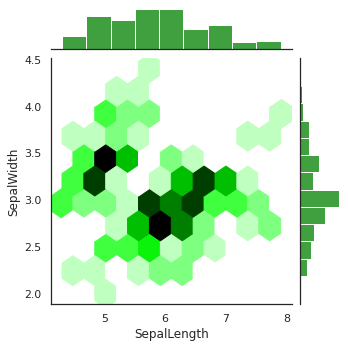

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


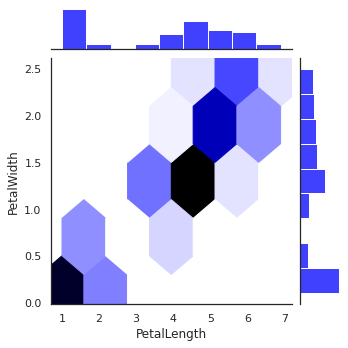

In [23]:
sns.jointplot(x="SepalLength", y="SepalWidth", data=iris, size=5,ratio=5, kind='hex',color='green')
plt.show()
sns.jointplot(x="PetalLength", y="PetalWidth", data=iris, size=5,ratio=5, kind='hex',color='blue')
plt.show()

In [26]:
train_labels = train['Species']
test_labels = test['Species']

### Exercise 3 : Preprocess the data

Implement the following steps:

1. Drop the label - Species, since we are doing Unsupervised learning we do not need labels.

 ###### You may want to save labels separately too verify if indeed your model has been able to cluster properly.

2. For PCA it is good if the data has zero mean and variance of 1. To achieve this subtract mean and  divide by standard deviation.


In [27]:
## Drop the labels

train.drop(columns=['Species'],inplace=True)
test.drop(columns=['Species'],inplace=True)

In [35]:
# Subtract mean from individual value and divide by standard deviation

normalized_train=(train - train.mean(axis = 0))/train.std(axis = 0)
normalized_test=(test - test.mean(axis = 0))/test.std(axis = 0)

### Exercise 4: 
Compute the SUV matrices using TensorFlow `linalg()` function. Once you get SUV matrices convert S matrix to diagonal matrix  using `tf.linalg.diag()` 

In [38]:
# Compute the SUV matrces
s, u, v = tf.linalg.svd(normalized_train)

In [40]:
s = tf.linalg.diag(s)

### Exercise 5:

Now compute the PCA for 2 principal components. See how the shape gets modified from original dataset and PCA dataset.

In [42]:
k = 2
pca = tf.matmul(u[:,0:k], s[0:k,0:k])

In [43]:
print('original data shape',train.shape)
print('reduced data shape', pca.shape)

original data shape (120, 4)
reduced data shape (120, 2)


### Exercise 6:
Let us plot and see if our PCA is able to cluster the dataset.

tf.Tensor([10  3], shape=(2,), dtype=int32)
{0: (0.4, 0.7607843137254902, 0.6470588235294118), 1: (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), 2: (0.5529411764705883, 0.6274509803921569, 0.796078431372549), 3: (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), 4: (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), 5: (1.0, 0.8509803921568627, 0.1843137254901961), 6: (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), 7: (0.7019607843137254, 0.7019607843137254, 0.7019607843137254), 8: (0.4, 0.7607843137254902, 0.6470588235294118), 9: (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)}


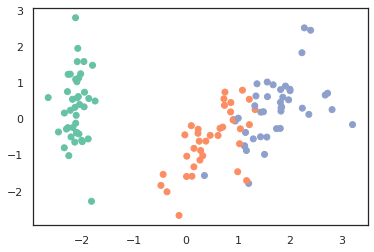

In [45]:
Set = sns.color_palette("Set2", 10)
print(tf.shape(Set))
# create a mapping that maps each of 10 keys (0..9) to colour value
color_mapping = {key:value for (key,value) in enumerate(Set)}
print(color_mapping)
# use mapping to assign colour to each of digits in training set labels y_train
colors = list(map(lambda x: color_mapping[x], train_labels))

plt.scatter(pca[:, 0], pca[:, 1], c=colors)

## Optional Exercise

Repeating the clustering process this time using the K-means algorithm on the Iris dataset. Reflect on the result.

In [48]:
points_n = 200
clusters_n = 3
iteration_n = 20
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)

In [46]:
# generate random 2D datapoints between 0 and 10
def initialize_points():
  points = np.random.uniform(0, 10, (points_n, 2))
  return points

def initialize_centroids(points, k):
  # and get random centroids
  centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1])
  return centroids

# closest_centrolids assigns each point to a closest centroid
# it takes points and centroids as parameters 
# for each point it returns an index of the closest centroid 0, 1, ... or clusters_n -1
def closest_centroids(points, centroids):
    # calculate distances between points and centoids
    distances = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:,None])), 2)
    assignments = tf.argmin(distances, 0)
    return assignments

# move_centroids recalculates position of new centroids as a mean of all points assigned to a centroid
def move_centroids(points, closest, centroids):
    # for each k index of centroid  from 0 to centroids.shape[0] (0 to clusters_n -1)
    # 
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

# plots centroids and assigned points
def plot_points_centroids(points, centroids, closest):
  plt.scatter(points[:, 0], points[:, 1], c=closest, s=50, alpha=0.5)
  plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
  plt.show()

In [63]:
points = normalized_train
centroids = initialize_centroids(points, clusters_n)
print(centroids)


tf.Tensor(
[[ 1.2146283   0.31604384  1.07613904  1.41084133]
 [-0.28207008 -0.38627581 -0.07637706  0.13213318]
 [-1.20311524 -0.15216926 -1.28377488 -1.14657497]], shape=(3, 4), dtype=float64)


In [58]:
closest = closest_centroids(points, centroids)
print(closest)

tf.Tensor(
[0 0 0 2 2 2 2 0 1 2 0 1 2 2 1 1 0 0 0 2 0 0 2 0 0 2 1 0 0 0 0 1 1 0 0 0 0
 0 2 2 1 0 0 2 2 0 2 0 2 0 2 1 1 2 1 0 0 0 0 0 1 0 0 0 0 0 2 0 0 2 2 1 2 0
 0 2 0 1 0 0 2 1 0 0 0 2 1 1 0 2 0 1 2 2 0 2 2 0 0 2 2 0 2 1 2 2 2 2 1 2 0
 1 2 0 2 0 1 2 2 1], shape=(120,), dtype=int64)
